In [ ]:
!wget -O imdb.zip -qq --no-check-certificate "https://drive.google.com/uc?export=download&id=1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc"
!unzip imdb.zip
!pip -q install eli5
!pip -q install spacy
!python -m spacy download en

# Классификация текстов

Начнём с самого простого - анализа тональности текста.

Будем классифицировать отзывы с IMDB на положительные/отрицательные.

Датасет взят с http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import pandas as pd

train_df = pd.read_csv("imdb/train.tsv", delimiter="\t")#, header = 1)
test_df = pd.read_csv("imdb/test.tsv", delimiter="\t")#, header = 1)

print('Train size = {}'.format(len(train_df)))
print('Test size = {}'.format(len(test_df)))

Train size = 25000
Test size = 25000


Посмотрите глазами на тексты? Какие есть зацепки, как определить, что это за сентимент?

Самое простое, как всегда - найти ключевые слова.

0        0
1        0
2        1
3        2
4        6
        ..
24995    0
24996    2
24997    3
24998    1
24999    0
Name: review, Length: 25000, dtype: int64 0        1
1        0
2        1
3        0
4        0
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: review, Length: 25000, dtype: int64
Test accuracy = 71.13%


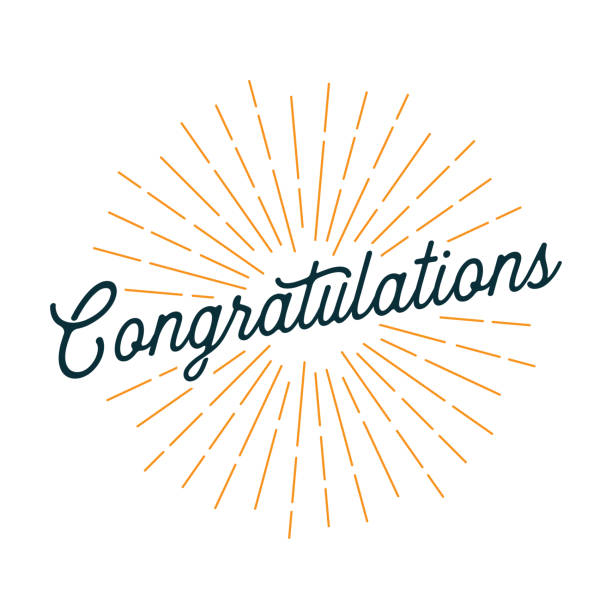

In [94]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'victoria','love', 'great', 'best', 'wonderful','good', 'excellent', 'cool', 'splendid', 'super','superbly', 'neat','power' #@param {type:"raw"}
negative_words = 'disappointment','ugly','waste','unfunny','pointless','lousy','worst', 'awful', '1/10', 'crap', 'lowbrow', 'stupid', 'dislocate', 'slater','bad', 'sucks', 'seagal', 'blah', 'damme', 'dreck','horrid','incoherent' #@param {type:"raw"}

positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
print(positives_count , negatives_count)
is_positive = positives_count > negatives_count
correct_count = (is_positive == test_df.is_positive).values.sum()

accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    from IPython.display import Image, display
    display(Image('cong.jpg', width=500))

In [93]:
from nltk import word_tokenize, FreqDist
import nltk

In [4]:
vocab_positive = set()
vocab_negative = set()
vocab_positive_freq = FreqDist()
vocab_negative_freq = FreqDist()

for ind,row in train_df.iterrows():
    if row['is_positive'] == 1:
        vocab_positive = set(row['review'].lower().split()).union(vocab_positive)
        vocab_positive_freq = FreqDist(word.lower() for word in word_tokenize(row['review'].lower()) if word.isalpha())+vocab_positive_freq
    elif row['is_positive'] == 0:
        vocab_negative = set(row['review'].lower().split()).union(vocab_negative)
        vocab_negative_freq = FreqDist(word.lower() for word in word_tokenize(row['review'].lower()) if word.isalpha())+vocab_negative_freq
    
    if ind % 1000 == 0:
        print(ind, len(vocab_positive), len(vocab_positive_freq), len(vocab_negative), len(vocab_negative_freq))

0 0 0 416 380
1000 20176 11916 18772 10961
2000 32210 17269 30750 16136
3000 41788 21130 40448 19896
4000 50633 24343 48765 22995
5000 58684 26991 56555 25645
6000 66020 29352 63998 28034
7000 72328 31298 71440 30405
8000 78773 33114 77715 32219
9000 84963 34960 83549 33840
10000 90730 36517 89264 35425
11000 96650 38068 94452 36771
12000 102423 39602 99768 38171
13000 107797 40977 104804 39454
14000 113034 42362 110046 40753
15000 118030 43636 114942 41923
16000 123085 44812 119463 43020
17000 127441 45788 124496 44208
18000 131982 46841 128872 45310
19000 136528 47898 133151 46253
20000 140624 48831 137792 47263
21000 145455 49940 141896 48198
22000 149642 50834 146106 49132
23000 153755 51681 150410 50145
24000 157684 52575 154810 51025


In [58]:
with open('vocab_positive_freq.txt', 'w',encoding='utf-8') as f:
    for item in vocab_positive_freq.most_common():
        f.write("%s\n" % str(item))
        
with open('vocab_negative_freq.txt', 'w',encoding='utf-8') as f:
    for item in vocab_negative_freq.most_common():
        f.write("%s\n" % str(item))

In [87]:
vocab_positive_freq['most']/vocab_negative_freq['most']

1.2407786885245902

In [ ]:
len(vocab_positive),len(vocab_negative)

In [ ]:
len(vocab_positive_freq),len(vocab_negative_freq)

In [ ]:
train_df['review']

In [68]:
b=[]
a=[]
for item in vocab_positive_freq:
    a.append(item)
for item in vocab_negative_freq:
    b.append(item)
print(len(a),len(b))

c=list(set(a)^set(b))
u=list(set(a)|set(b))
    

53441 51892


In [69]:
len(c)

37653

In [70]:
len(set(u))

71493

In [33]:
for item in c:
#     if vocab_positive_freq[str(item)] > 2:
#         print(f'Positve word {item} count - {vocab_positive_freq[str(item)]}')    
    if vocab_positive_freq[str(item)] < 200 and vocab_positive_freq[str(item)] > 30:
        print(f'Positive word {item} count - {vocab_positive_freq[str(item)]}')

Positive word newcombe count - 33
Positive word caruso count - 37
Positive word flavia count - 48
Positive word harilal count - 40
Positive word bathsheba count - 31
Positive word deathtrap count - 45
Positive word ahmad count - 37
Positive word mcintire count - 33
Positive word gypo count - 60
Positive word kei count - 31
Positive word blackie count - 31
Positive word tsui count - 38
Positive word kells count - 47
Positive word mj count - 35
Positive word goldsworthy count - 65
Positive word brashear count - 47
Positive word blandings count - 48
Positive word sabu count - 36
Positive word jaffar count - 31
Positive word kriemhild count - 31
Positive word din count - 76
Positive word dominick count - 36
Positive word daisies count - 33
Positive word aweigh count - 35
Positive word visconti count - 51
Positive word khouri count - 36
Positive word edie count - 109
Positive word antwone count - 88
Positive word yokai count - 59
Positive word gino count - 45
Positive word ossessione count 

In [131]:
koef = 30 
for item in u:
    if vocab_positive_freq[str(item)] > vocab_negative_freq[str(item)] and vocab_negative_freq[str(item)] != 0:
        if vocab_positive_freq[str(item)]/vocab_negative_freq[str(item)] < koef and vocab_positive_freq[str(item)]/vocab_negative_freq[str(item)]>3 and vocab_negative_freq[str(item)]!=1:
            print(f'Positive word {item} koef - {vocab_positive_freq[str(item)]/vocab_negative_freq[str(item)]}')
    elif vocab_positive_freq[str(item)] !=0 and vocab_positive_freq[str(item)] != vocab_negative_freq[str(item)]:
        if vocab_negative_freq[str(item)]/vocab_positive_freq[str(item)] < koef and vocab_negative_freq[str(item)]/vocab_positive_freq[str(item)]>3 and vocab_positive_freq[str(item)]!=1:
            print(f'Negative word {item} koef - {vocab_negative_freq[str(item)]/vocab_positive_freq[str(item)]}')


NameError: name 'vocab_positive_freq' is not defined

**Задание** Придумайте хорошие ключевые слова или фразы и наберите хотя бы 71% точности на тесте (и не забудьте посмотреть на код классификации!)

**Задание** Кому-нибудь нравятся эти `<br /><br />`? Лично мне - нет. Напишите регулярку, которая будет их удалять

In [101]:
import re

pattern = re.compile('<br />')

print(train_df['review'].iloc[3])
print(pattern.subn(' ', train_df['review'].iloc[3])[0])

Spoilers ahead if you want to call them that...<br /><br />I would almost recommend this film just so people can truly see a 1/10. Where to begin, we'll start from the top...<br /><br />THE STORY: Don't believe the premise - the movie has nothing to do with abandoned cars, and people finially understanding what the mysterious happenings are. It's a draub, basic, go to cabin movie with no intensity or "effort".<br /><br />THE SCREENPLAY: I usually give credit to indie screenwriters, it's hard work when you are starting out...but this is crap. The story is flat - it leaves you emotionless the entire movie. The dialogue is extremely weak and predictable boasting lines of "Woah, you totally freaked me out" and "I was wondering if you'd uh...if you'd like to..uh, would you come to the cabin with me?". It makes me want to rip out all my hair, one strand at a time and feed it to myself.<br /><br />THE CHARACTERS: HOLY CRAP!!!! Some have described the characters as flat, I want to take it one 

Применим ее:

In [102]:
train_df['review'] = train_df['review'].apply(lambda text: pattern.subn(' ', text)[0])
test_df['review'] = test_df['review'].apply(lambda text: pattern.subn(' ', text)[0])

Пора переходить к машинке!

Как будем представлять текст? Проще всего - мешком слов.

Заведём большой-большой словарь - список всех слов в обучающей выборке. Тогда каждое предложение можно представить в виде вектора, в котором будет записано, сколько раз встретилось каждое из возможных слов:

![bow](https://raw.githubusercontent.com/DanAnastasyev/DeepNLP-Course/master/Week%2001/Images/BOW.png)

Простой и приятный способ сделать это - запихнуть тексты в `CountVectorizer`.

Он имеет такую сигнатуру:

```python
CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern=r'(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64'>)
```

Для начала обратим внимание на параметры `lowercase=True` и `max_df=1.0, min_df=1, max_features=None` - они про то, что по умолчанию все слова будут приводиться к нижнему регистру и в словарь попадут все слова, встречавшиеся в текстах.

При желании можно было бы убрать слишком редкие или слишком частотные слова - пока не будем этого делать.

Посмотрим на простом примере, как он будет работать:

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dummy_data = ['The movie was excellent',
              'the movie was awful']

dummy_matrix = vectorizer.fit_transform(dummy_data)

print(dummy_matrix.toarray())
print(vectorizer.get_feature_names())

[[0 1 1 1 1]
 [1 0 1 1 1]]
['awful', 'excellent', 'movie', 'the', 'was']


C:\Anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


*Как именно vectorizer определяет границы слов? Обратите внимание на параметр `token_pattern=r'(?u)\b\w\w+\b'` - как он будет работать?*

Запустим его на реальных данных:

In [104]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['review'].values)

CountVectorizer()

Посмотрим на слова, попавшие в словарь:

In [105]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

Попробуем кого-нибудь таки сконвертировать

In [106]:
vectorizer.transform([train_df['review'].iloc[3]])

<1x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 206 stored elements in Compressed Sparse Row format>

То, что и хотели - вектор с bow (т.е. bag-of-words) представлением исходного текста.

И чем эта информация может помочь? Ну, всё тем же - какие-то слова носят положительный окрас, какие-то - отрицательный. Большинство вообще нейтральный, да.

![bow with weights](https://github.com/DanAnastasyev/DeepNLP-Course/raw/master/Week%2001/Images/BOW_weights.png)

Хочется, наверное, подобрать коэффициенты, которые будут определять уровень окраса, да? Подбирать нужно по обучающей выборке, а не как мы перед этим делали.

Например, для выборки
```
1   The movie was excellent
0   the movie was awful
```
легко подобрать коэффициенты на глазок: что-нибудь вроде `+1` для `excellent`,  `-1` для `awful` и по нулям всем остальным.

Построим линейную модель, которая станет этим заниматься. Она будет учиться строить разделяющую гиперплоскость в пространстве bow-векторов.

Проверим, как справится логистическая регрессия с нашей супер-выборкой из пары предложений

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

dummy_data = ['The movie was excellent',
              'the movie was awful']
dummy_labels = [1, 0]

vectorizer = CountVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(dummy_data, dummy_labels)

print(vectorizer.get_feature_names())
print(classifier.coef_)

['awful', 'excellent', 'movie', 'the', 'was']
[[-0.40104279  0.40104279  0.          0.          0.        ]]


C:\Anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Получилось что надо.

Запустим теперь её на реальных данных.

In [108]:
model.fit(train_df['review'], train_df['is_positive'])

C:\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [109]:
from sklearn.metrics import accuracy_score

def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    
eval_model(model, test_df)

Test accuracy = 86.49%


Прогресс!

Хочется как-то посмотреть, что заинтересовало классификатор. К счастью, сделать это совсем просто:

In [110]:
import eli5
eli5.show_weights(classifier, vec=vectorizer, top=40)

C:\Anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+1.872,refreshing
+1.780,wonderfully
+1.712,funniest
+1.663,surprisingly
+1.643,rare
+1.445,superb
+1.378,incredible
+1.377,excellent
+1.328,perfect
+1.312,delightful


Посмотрим на конкретные примеры его работы:

In [111]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


In [112]:
print('Positive' if test_df['is_positive'].iloc[6] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[6], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Negative


C:\Anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Посмотрим на примеры неправильной классификации, наконец:

In [113]:
import numpy as np

preds = model.predict(test_df['review'])
incorrect_pred_index = np.random.choice(np.where(preds != test_df['is_positive'])[0])

eli5.show_prediction(classifier, test_df['review'].iloc[incorrect_pred_index],
                     vec=vectorizer, targets=['positive'], target_names=['negative', 'positive'])

C:\Anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Придумываем новые признаки

### Tf-idf

Сейчас мы на все слова смотрим с одинаковым весом - хотя какие-то из них более редкие, какие-то более частые, и эта частотность - полезная, вообще говоря, информация.

Самый простой способ добавить статистическую информацию о частотностях - сделать *tf-idf* взвешивание:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \times \text{idf}(t)$$

*tf* - term-frequency - частотность слова `t` в конкретном документе `d` (рецензии в нашем случае). Это ровно то, что мы уже считали.

*idf* - inverse document-frequency - коэффициент, который тем больше, чем в меньшем числе документов встречалось данное слово. Считается как-нибудь так:
$$\text{idf}(t) = \text{log}\frac{1 + n_d}{1 + n_{d(t)}} + 1$$
где $n_d$ - число всех документов, а $n_{d(t)}$ - число документов со словом `t`.

Использовать его просто - нужно заменить `CountVectorizer` на `TfidfVectorizer`.

**Задание** Попробуйте запустить `TfidfVectorizer`. Посмотрите на ошибки, которые он научился исправлять, и на ошибки, которые он начал делать - по сравнению с `CountVectorizer`.

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.28%


### N-граммы слов

До сих пор мы смотрели на тексты как на мешок слов - но очевидно, что есть разница между `good movie` и `not good movie`.

Добавим информацию (хоть какую-то) о последовательностях слов - будем извлекать еще и биграммы слов.

В Vectorizer'ах для этого есть параметр `ngram_range=(n_1, n_2)` - он говорит, что нужны n_1-...n_2-граммы.

**Задание** Попробуйте увеличенный range и поинтерпретируйте полученный результат.

In [115]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.64%


### N-граммы символов

Символьные n-граммы дают простой способ выучить полезные корни и суффиксы, не связываясь с этой вашей лингвистикой - только статистика, только хардкор.

Например, слово `badass` мы можем представить в виде такой последовательности триграмм:

`##b #ba bad ada das ass ss# s##`

So interpretable, неправда ли?

Реализовать это дело всё так же просто - нужно поставить `analyzer='char'` в вашем любимом Vectorizer'е и выбрать размер `ngram_range`.

**Задание** Запилите классификатор на n-граммах символов и визуализируйте его.

In [116]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

C:\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test accuracy = 87.86%


In [117]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


C:\Anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Подключаем лингвистику

### Лемматизация и стемминг

Если присмотреться, можно найти формы одного слова с разной семантической окраской по мнению классификатора. Или нет?

**Задание** Найти формы слова с разной семантической окраской.

Поверя, что они есть, попробуем что-нибудь с этим сделать.

Например, лемматизируем - сведем к начальной форме все слова. Поможет в этом библиотека spacy.

In [119]:
import spacy
from spacy import displacy

#nlp = spacy.load('en', disable=['parser'])
nlp = spacy.load("en_core_web_sm", disable=['parser'])

docs = [doc for doc in nlp.pipe(train_df.review.values[:50])]

In [120]:
for token in docs[0]:
    print(token.text, token.lemma_, token.ent_iob_, token.ent_type_)

Dreamgirls Dreamgirls O 
, , O 
despite despite O 
its its O 
fistful fistful O 
of of O 
Tony Tony B PERSON
wins win O 
in in O 
an an B DATE
incredibly incredibly I DATE
weak weak I DATE
year year I DATE
on on O 
Broadway Broadway B FAC
, , O 
has have O 
never never O 
been be O 
what what O 
one one O 
would would O 
call call O 
a a O 
jewel jewel O 
in in O 
the the O 
crown crown O 
of of O 
stage stage O 
musicals musical O 
. . O 
However however O 
, , O 
that that O 
is be O 
not not O 
to to O 
say say O 
that that O 
in in O 
the the O 
right right O 
cinematic cinematic O 
hands hand O 
it it O 
could could O 
not not O 
be be O 
fleshed flesh O 
out out O 
and and O 
polished polish O 
into into O 
something something O 
worthwhile worthwhile O 
on on O 
- - O 
screen screen O 
. . O 
Unfortunately unfortunately O 
, , O 
what what O 
transfers transfer O 
to to O 
the the O 
screen screen O 
is be O 
basically basically O 
a a O 
slavishly slavishly O 
faithful faithful

big big O 
effort effort O 
the the O 
film film O 
makes make O 
to to O 
show show O 
Effie Effie B ORG
's 's O 
mothering mothering O 
is be O 
to to O 
tell tell O 
us we O 
about about O 
it it O 
and and O 
then then O 
include include O 
a a O 
scene scene O 
where where O 
she she O 
barks bark O 
at at O 
her her O 
daughter daughter O 
in in O 
the the O 
unemployment unemployment O 
office office O 
, , O 
insists insist O 
that that O 
the the O 
girl girl O 
has have O 
" " O 
no no O 
father father O 
" " O 
and and O 
then then O 
refuse refuse O 
to to O 
look look O 
for for O 
gainful gainful O 
employment employment O 
to to O 
support support O 
them they O 
since since O 
singing singing O 
is be O 
all all O 
she she O 
knows know O 
. . O 
In in O 
the the O 
hands hand O 
of of O 
a a O 
skillful skillful O 
actress actress O 
, , O 
the the O 
gaps gap O 
could could O 
perhaps perhaps O 
have have O 
been be O 
remedied remedied O 
with with O 
technique techn

**Задание** Сделайте классификатор на лемматизированных текстах.

Более простой способ нормализации слов - использовать стемминг. Он немного тупой, не учитывает контекст, но иногда оказывается даже эффективнее лемматизации - а, главное, быстрее.

По сути это просто набор правил, как обрезать слово, чтобы получить основу (stem):

In [121]:
from nltk import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('become'))
print(stemmer.stem('becomes'))
print(stemmer.stem('became'))

becom
becom
becam


**Задание** Попробуйте вместо лемм классифицировать основы.

### NER

В текстах рецензий очень много именованных сущностей. Вот, например:

In [122]:
displacy.render(docs[0], style='ent', jupyter=True)

Вообще говоря, почему вдруг какой-нибудь Депп должен нести семантическую окраску? Однако оказывается, что классификатор выучивает, что какие-то имена чаще в положительных рецензиях - или наоборот. Это похоже на переобучение - почему бы не попробовать вырезать сущности?

**Задание** Удалите из текстов какие-то из сущностей, пользуясь координатами из запикленных файлов. Описание сущностей можно посмотреть [здесь](https://spacy.io/api/annotation#named-entities). Запустите классификатор.

## Включаем дип лёрнинг

Мы тут пришли deep learning'ом заниматься, а делаем почему-то модель на логистической регрессии. Как так?

Попробуем запустить относительно стандартную модель для классификации текстов - сверточная сеть поверх словных эмбеддингов.

Разбираться, что это за зверь, будем на следующих занятиях, а пока будем просто им пользоваться :)

Каждое предложение нужно представлять набором слов - и сразу же начинаются проблемы. Во-первых, как ограничить длину предложения?

Прикинем по гистограмме, какая длина нам подходит:

In [123]:
train_df['review']

0        Dreamgirls, despite its fistful of Tony wins i...
1        This show comes up with interesting locations ...
2        I simply love this movie. I also love the Ramo...
3        Spoilers ahead if you want to call them that.....
4        My all-time favorite movie! I have seen many m...
                               ...                        
24995    I am a big fan of the movie, but not for the u...
24996    I'm not going to bother with a plot synopsis s...
24997    This movie . . . I don't know. Why they would ...
24998    Saw this film on DVD yesterday and was gob-sma...
24999    This was a disappointment - none of the nuance...
Name: review, Length: 25000, dtype: object

<BarContainer object of 231 artists>

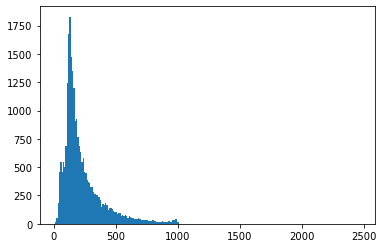

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

_, _, hist = plt.hist(train_df.review.apply(lambda text: len(text.split())), bins='auto')
hist

Кроме этого, нужно перенумеровать как-то слова.

In [125]:
%%time
from collections import Counter

words_counter = Counter((word for text in train_df.review for word in text.lower().split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10:
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

Words count 26783
Wall time: 1.78 s


**Задание** Сконвертируйте данные

In [147]:
%%time

def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int)
    return data

X_train = convert(train_df.review, word2idx, 2000)
X_test = convert(test_df.review, word2idx, 2000)

C:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informa

Wall time: 8.39 s


In [148]:
X_train.shape, X_test.shape

((25000, 2000), (25000, 2000))

Поставим учиться модельку на keras.

*Напоминание*: на keras, чтобы обучить модель, нужно
1. Определить модель, например:
```python 
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=NUM_WORDS))
```
2. Задать функцию потерь и оптимизатор:
```python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

3. Запустить обучение:
```python
model.fit(X_train, y_train, 
          batch_size=32,
          epochs=3,
          validation_data=(X_test, y_test))
```

В NLP чаще всего ставятся задачи классификации, поэтому нужно запомнить такие функции потерь:

*   **categorical_crossentropy** - для многоклассовой классификации, в качестве меток должны передаваться one-hot-encoding вектора
*   **sparse_categorical_crossentropy** - аналогично предыдущему, но в качестве меток нужно передавать просто индексы соответствующих классов
*   **binary_crossentropy** - для бинарной классификации


В качестве оптимизатора обычно используют `sgd` или `adam`.


In [149]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [175]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout, LSTM

In [150]:
%%time

model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2000, 64)          1714112   
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,714,883
Trainable params: 1,714,883
Non-trainable params: 0
____________________________________________

In [151]:
%%time

history = model.fit(X_train, train_df.is_positive, batch_size=128, epochs=10, 
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 35s 178ms/step - loss: 0.6263 - accuracy: 0.6525 - val_loss: 0.4823 - val_accuracy: 0.8321
Epoch 2/10
196/196 [==============================] - 36s 182ms/step - loss: 0.3386 - accuracy: 0.8755 - val_loss: 0.3078 - val_accuracy: 0.8718
Epoch 3/10
196/196 [==============================] - 36s 183ms/step - loss: 0.1893 - accuracy: 0.9320 - val_loss: 0.2940 - val_accuracy: 0.8759
Epoch 4/10
196/196 [==============================] - 36s 183ms/step - loss: 0.1070 - accuracy: 0.9682 - val_loss: 0.3211 - val_accuracy: 0.8740
Epoch 5/10
196/196 [==============================] - 38s 192ms/step - loss: 0.0534 - accuracy: 0.9881 - val_loss: 0.3611 - val_accuracy: 0.8696
Epoch 6/10
196/196 [==============================] - 35s 178ms/step - loss: 0.0249 - accuracy: 0.9966 - val_loss: 0.4072 - val_accuracy: 0.8676
Epoch 7/10
196/196 [==============================] - 32s 164ms/step - loss: 0.0133 - accuracy: 0.9987 - val_loss: 0.4454 - val_ac

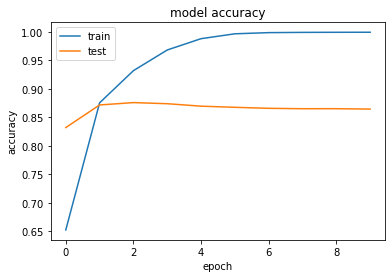

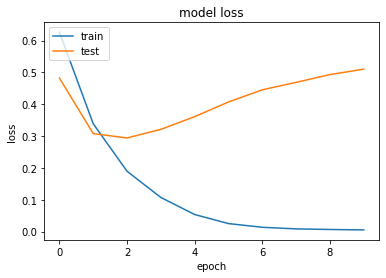

In [152]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>loos растет на тестовых данных, попробуем добавить слои Dropout для снижения переобучения

In [168]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dropout(.5, seed=42),    
    Dense(units=10, activation='relu'),
    Dropout(.5, seed=42), 
    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 2000, 64)          1714112   
                                                                 
 global_max_pooling1d_7 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                      

In [169]:
%%time

history = model.fit(X_train, train_df.is_positive, batch_size=128, epochs=10, 
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 34s 171ms/step - loss: 0.6724 - accuracy: 0.5781 - val_loss: 0.5936 - val_accuracy: 0.8040
Epoch 2/10
196/196 [==============================] - 33s 169ms/step - loss: 0.5171 - accuracy: 0.7516 - val_loss: 0.3983 - val_accuracy: 0.8592
Epoch 3/10
196/196 [==============================] - 33s 169ms/step - loss: 0.3858 - accuracy: 0.8475 - val_loss: 0.3262 - val_accuracy: 0.8708
Epoch 4/10
196/196 [==============================] - 33s 171ms/step - loss: 0.2964 - accuracy: 0.8850 - val_loss: 0.3036 - val_accuracy: 0.8740
Epoch 5/10
196/196 [==============================] - 33s 170ms/step - loss: 0.2252 - accuracy: 0.9206 - val_loss: 0.3130 - val_accuracy: 0.8706
Epoch 6/10
196/196 [==============================] - 34s 173ms/step - loss: 0.1641 - accuracy: 0.9473 - val_loss: 0.3271 - val_accuracy: 0.8702
Epoch 7/10
196/196 [==============================] - 34s 172ms/step - loss: 0.1200 - accuracy: 0.9608 - val_loss: 0.3723 - val_ac

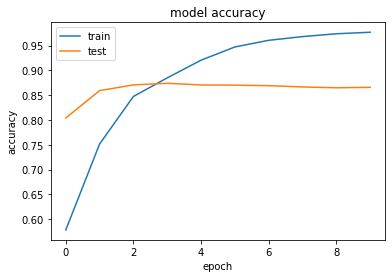

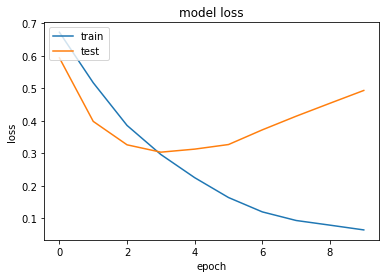

In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [231]:
model3 = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dropout(.5, seed=42),    
    Dense(units=10, activation='relu'),
    Dropout(.5, seed=42), 
    Dense(units=1, activation='sigmoid')
])

model3.summary()

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 2000, 64)          1714112   
                                                                 
 global_max_pooling1d_23 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_64 (Dense)            (None, 10)                650       
                                                                 
 dropout_36 (Dropout)        (None, 10)                0         
                                                                 
 dense_65 (Dense)            (None, 10)                110       
                                                                 
 dropout_37 (Dropout)        (None, 10)                0         
                                                     

In [228]:
len(X_test),len(train_df)

(25000, 25000)

In [232]:
%%time

history3 = model3.fit(X_test, test_df.is_positive, batch_size=128, epochs=10)

Epoch 1/10
196/196 [==============================] - 30s 148ms/step - loss: 0.6669 - accuracy: 0.5887
Epoch 2/10
196/196 [==============================] - 32s 161ms/step - loss: 0.4955 - accuracy: 0.7660
Epoch 3/10
196/196 [==============================] - 39s 201ms/step - loss: 0.3641 - accuracy: 0.8443
Epoch 4/10
196/196 [==============================] - 35s 178ms/step - loss: 0.2785 - accuracy: 0.8969
Epoch 5/10
196/196 [==============================] - 36s 184ms/step - loss: 0.2165 - accuracy: 0.9283
Epoch 6/10
196/196 [==============================] - 34s 171ms/step - loss: 0.1605 - accuracy: 0.9550
Epoch 7/10
196/196 [==============================] - 31s 159ms/step - loss: 0.1213 - accuracy: 0.9689
Epoch 8/10
196/196 [==============================] - 31s 157ms/step - loss: 0.0974 - accuracy: 0.9762
Epoch 9/10
196/196 [==============================] - 32s 163ms/step - loss: 0.0767 - accuracy: 0.9818
Epoch 10/10
196/196 [==============================] - 31s 160ms/step - l

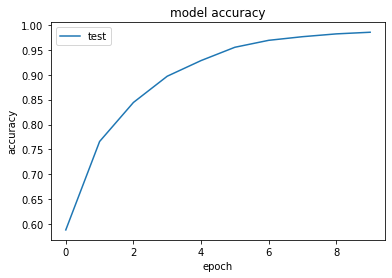

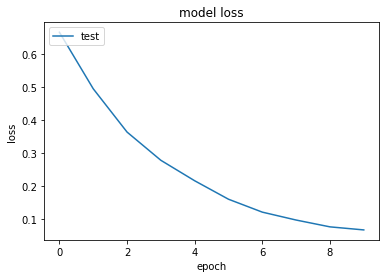

In [242]:
plt.plot(history3.history['accuracy'])
#plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
#plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

**Задание** Подсчитайте качество модели на тесте